In [16]:
from dsc80_utils import *

# <span style="color:#7b40c7">Pre-Lecture Reading</span> for Lecture 6 – Hypothesis Testing

## DSC 80, Winter 2024

<div class="alert alert-success">
<b>Make sure to read this before attending lecture.</b>

You can also access this notebook by pulling the course GitHub repository and opening <code>lectures/lec06/pre-lec06.ipynb</code>.
</div>

In this lecture, we'll give a bit more context for _why_ we're revisiting hypothesis testing. Here, we'll review the hypothesis testing framework you saw in DSC 10 by walking through a concrete example: coin flipping.

## Example: Coin flipping

### Coin flipping

Suppose that we find a coin on the ground and aren't sure if it's a fair coin.

We flip it 100 times and see 59 heads and 41 tails. We consider two possibilities:

- The coin is fair, and we just happened to see 59 heads.
- The coin isn't fair, because it's biased in favor of heads.

At a high level, we want to try and answer the question, **how likely is it that we'd see at least 59 heads in 100 flips of a fair coin?**

- If it's rare to see at least 59 heads in 100 flips of a fair coin, then the evidence suggests our coin isn't fair; in this case, we'd _think_ the coin isn't fair.
- If it's not that rare to see at least 59 heads in 100 flips of a fair coin, then we can't say our coin isn't fair; in this case, we'd _think_ the coin is fair.

### Setup

- **Observation**: We flipped a coin 100 times, and saw 59 heads and 41 tails.

- **Null Hypothesis**: The coin is fair.

- **Alternative Hypothesis**: The coin is biased in favor of heads.

- **Test Statistic**: Number of heads, $N_H$.

### Generating the null distribution

- Now that we've chosen a test statistic, we need to generate the distribution of the test statistic under the assumption the null hypothesis is true, i.e. the **null distribution**.

- This distribution will give us, for example:
    - The probability of seeing exactly 4 heads in 100 flips of a fair coin.
    - The probability of seeing at most 46 heads in 100 flips of a fair coin.
    - **The probability of seeing at least 59 heads in 100 flips of a fair coin.**
- The whole point of generating this distribution is to **quantify how rare our observation was**.
    - If the probability of seeing at least 59 heads in 100 flips of a fair coin is large, then our outcome was not that rare.
    - If that probability is small, then our outcome was rare.

In the diagram below, let $\theta$ represent a simulated test statistic, and let $\hat{\theta}$ represent the observed statistic (59 in our case).

<img src="imgs/hyp-test-observed.svg" width="70%"/>
<img src="imgs/hyp-test-sampling-dist.svg" width="100%" />

### Generating the null distribution

- In this case, we can actually find the null distribution using math.
    - The number of heads in $N$ flips of a fair coin follows the $\text{Binomial}(N, 0.5)$ distribution:
    $$P(\text{# heads} = k) = {100 \choose k} (0.5)^k{(1-0.5)^{100-k}} = {100 \choose k} 0.5^{100}$$

- But, we'll often pick test statistics for which we don't know the true probability distribution. In such cases, we'll have to **simulate, as we did in DSC 10**. That's what we'll do in this example, too.
- Simulations provide us with **empirical distributions of test statistics**; if we simulate with a large (>= 10,000) number of repetitions, the empirical distribution of the test statistic should look similar to the true probability distribution of the test statistic, thanks to the **law of large numbers**.

### Generating the null distribution

First, let's figure out how to perform one instance of the experiment – that is, how to flip 100 coins once. Recall, to sample from a categorical distribution, we use `np.random.multinomial`.

In [43]:
# Flipping a fair coin 100 times.
# Interpret the result as [Heads, Tails].
np.random.multinomial(100, [0.5, 0.5])

array([54, 46])

Then, we can repeat it a large number of times.

In [44]:
# delete
import pandas as pd
import numpy as np
import plotly.express as px

In [45]:
# 100,000 times, we want to flip a coin 100 times.
results = []

for _ in range(100_000):
    num_heads = np.random.multinomial(100, [0.5, 0.5])[0]
    results.append(num_heads)

Each entry in `results` is the number of heads in 100 simulated coin flips.

In [47]:
results[:20]

[np.int64(46),
 np.int64(51),
 np.int64(48),
 np.int64(49),
 np.int64(48),
 np.int64(48),
 np.int64(55),
 np.int64(56),
 np.int64(54),
 np.int64(49),
 np.int64(46),
 np.int64(45),
 np.int64(43),
 np.int64(47),
 np.int64(59),
 np.int64(47),
 np.int64(48),
 np.int64(54),
 np.int64(43),
 np.int64(50)]

### Visualizing the empirical distribution of the test statistic

In [48]:
# Needed to add renderer
import plotly.io as pio

# Notebook 7 (new Jupyter) – best bet:
pio.renderers.default = "plotly_mimetype"


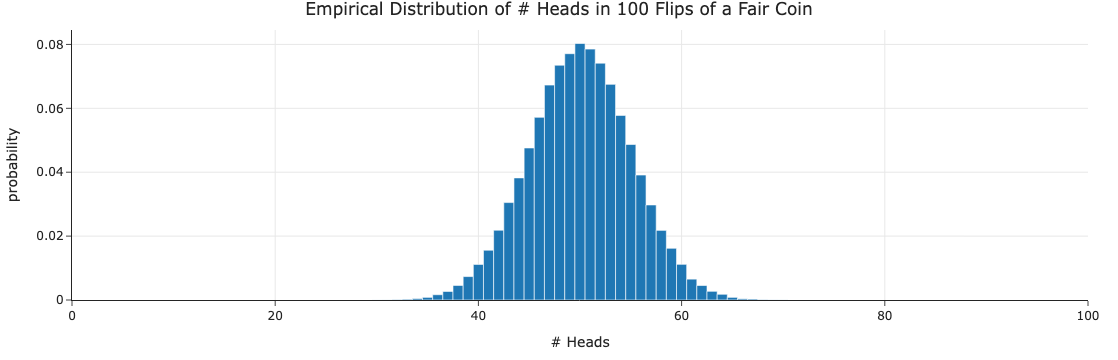

In [49]:
import plotly.express as px
fig = px.histogram(pd.DataFrame(results, columns=['# Heads']), x='# Heads', nbins=50, histnorm='probability', 
                   title='Empirical Distribution of # Heads in 100 Flips of a Fair Coin')
fig.update_layout(xaxis_range=[0, 100])

We can compute the p-value, which is the **probability of seeing a result as or more extreme than the observed, under the null**.

In [50]:
(np.array(results) >= 59).mean()

np.float64(0.04461)

The p-value is the orange area in the diagram below.

<img src="imgs/hyp-test-observed.svg" width="70%" />
<img src="imgs/hyp-test-coin-flips-simulated.svg" width="100%" />

### Making a decision

We saw that, in 100 flips of a fair coin, **the probability of seeing 59 or more heads is only ~4.4%**.

- This is quite low – it suggests that our observed result is quite unlikely **under** the null.

- As such, we will **reject the null hypothesis** – our observation is **not consistent** with the hypothesis that the coin is fair.

- The null still may be true – it's possible that the coin we flipped was fair, and we just happened to see a rare result. For the same reason, we also **cannot "accept"** the alternative.

- This probability – **the probability of seeing a result at least as extreme as the observed, under the null hypothesis** – is called the p-value.

    - If the p-value is below a pre-defined cutoff (often 5%), we reject the null.
    - Otherwise, we fail to reject the null.

### ⚠️ We can't "accept" the null!

- Note that we are very careful in saying that we either **reject the null** or **fail to reject the null**.

- Just because we fail to reject the null, it doesn't mean the null is true – we cannot "accept" it.

- Example:
    - Suppose there is a coin that is truly biased towards heads, with probability 0.55.
    - We flip it 10 times and see 5 heads and 5 tails.
    - If we conduct a hypothesis test where the null is that the coin is fair, we will fail to reject the null.
    - But the null isn't true.

Note that the p-value we found above is close, but not identical, to the "true" p-value we'd find if we used the exact distribution of the number of heads in 100 flips of a fair coin. That's because we computed our p-value using a simulation, and hence an approximation.

In [11]:
# Exact p-value, using the Binomial(100, 0.5) distribution.
from scipy.special import comb

def p_k_heads(k):
    return comb(100, k) * (0.5) ** 100

print('Simulated p-value:', (np.array(results) >= 59).mean())
print('Exact p-value:' + ' ' * 4, sum([p_k_heads(k) for k in range(59, 101)]))

Simulated p-value: 0.0445
Exact p-value:     0.04431304005703377


## Reflection

### Can we make things faster? 🏃

A mantra so far in this course has been **avoid `for`-loops whenever possible**. That applies here, too.

`np.random.multinomial` (and `np.random.choice`) accepts a `size` argument. By providing `size=100_000`, we can tell `numpy` to draw 100 elements from a uniform distribution, `100_000` times, **without needing a `for`-loop!**

In [12]:
# An array with 100000 rows and 2 columns.
np.random.multinomial(100, [0.5, 0.5], size=100_000)

array([[43, 57],
       [44, 56],
       [38, 62],
       ...,
       [50, 50],
       [55, 45],
       [54, 46]])

In [13]:
# Just the first column of the above array.
np.random.multinomial(100, [0.5, 0.5], size=100_000)[:, 0]

array([50, 48, 46, ..., 49, 48, 55])

In [14]:
%%time

faster_results = np.random.multinomial(100, [0.5, 0.5], size=100_000)[:, 0]

CPU times: user 14.7 ms, sys: 1.87 ms, total: 16.6 ms
Wall time: 14.5 ms


The above approach is orders of magnitude faster than the `for`-loop approach! With that said, you are still _allowed_ to use `for`-loops for hypothesis (and permutation) tests on assignments.

In [15]:
%%time

# 100,000 times, we want to flip a coin 100 times.
results = []

for _ in range(100_000):
    num_heads = np.random.multinomial(100, [0.5, 0.5])[0]
    results.append(num_heads)

CPU times: user 99 ms, sys: 6.33 ms, total: 105 ms
Wall time: 100 ms


### Choosing alternative hypotheses and test statistics

- The alternative hypothesis we chose was **the coin is biased in favor of heads**, and the test statistic we chose was the number of heads, $N_H$.

- We could've also chosen one the following options; each of them has the quality that **large values point to one hypothesis, and small values point to the other**:
    - $\frac{N_H}{100}$, the proportion of heads.
    - $N_H - 50$, the difference from the expected number of heads.

- What if our alternative hypothesis was **the coin is biased (either towards heads or tails)**?

### Absolute test statistics

For the alternative hypothesis "the coin is biased", one test statistic we could use is $\big|N_H - \frac{N}{2}\big|$, the absolute difference from the expected number of heads.

- **If this test statistic is large, it means that there were many more heads than expected, or many fewer heads than expected. If this test statistic is small, it means that the number of heads was close to expected.**

- For instance, suppose we flip 100 coins, and I tell you the absolute difference from the expected number of heads is 20.

- Then, either we flipped 70 heads or 30 heads. 

- If our alternative hypothesis is that the coin was biased, then it doesn't matter in which direction it was biased, and this test statistic works.

- But if our alternative hypothesis is that the coin was biased towards heads, then this is not helpful, because we don't know whether or not there were 70 heads (evidence for the alternative) or 30 heads (not evidence for the alternative).  

### Important

We'd like to choose a test statistic such that large values of the test statistic correspond to one hypothesis, and small values correspond to the other. 

**In other words, we'll try to avoid "two-tailed tests".** Rough rule of thumb:

- If the alternative hypothesis is "A > B", then the test statistic should measure differences and **should not** contain an absolute value.

- If the alternative hypothesis is "A and B are different", then the test statistic should measure distances and **should** contain an absolute value.

By taking the absolute value of a test statistic that involves a difference, we go from having to look at two tails of the distribution of the test statistic to just one tail, which is easier:

<center><img src="imgs/folding.png" width=70%></center>

### Fun fact

- One researcher found that coin flips aren't 50/50, but rather are closer to 51/49, biased towards whichever side started facing up.
- [Read this](https://www.smithsonianmag.com/science-nature/gamblers-take-note-the-odds-in-a-coin-flip-arent-quite-5050-145465423) for more details.

<div class="alert alert-success" markdown="1">

<h2>Thanks for reading!</h2>

If you made it this far, tell us by clicking Option C in [**this form (q.dsc80.com)**](https://docs.google.com/forms/d/e/1FAIpQLScWbVZv9hBv-wX-ItKHUVRnkPMMtfJZVfErKE9GS7_8dFcRBQ/viewform). If you have lingering questions, write them in the "What questions do you have?" section of the form.

And tell your friends to read this before class, too!

</div>